In [439]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import pylab as plt

import time

## Reading in Data

### Users Data:
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [4]:
users_df = pd.read_csv('/Users/hean/Desktop/Xinxuan/ml-1m/users.dat', 
                       header = None, sep = '::', engine = 'python', encoding = 'ISO-8859-1')
users_df.columns = ['userID', 'gender', 'age', 'occupation', 'zip_code']

In [7]:
users_df.head()

,userID,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
users_df.shape

(6040, 5)

### Movies Data:
- Genres are pipe-separated and are selected from the following genres:
	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

In [5]:
movie_df = pd.read_csv('/Users/hean/Desktop/Xinxuan/ml-1m/movies.dat', 
                       header = None, sep = '::', engine = 'python', encoding = 'ISO-8859-1')
movie_df.columns = ['movieID', 'title', 'genres']

In [6]:
movie_df.head()

,movieID,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
movie_df.shape

(3883, 3)

### Ratings Data
- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

In [8]:
ratings_df = pd.read_csv('/Users/hean/Desktop/Xinxuan/ml-1m/ratings.dat', 
                       header = None, sep = '::', engine = 'python', encoding = 'ISO-8859-1')
ratings_df.columns = ['userID', 'movieID', 'rating', 'timestamp']

In [9]:
ratings_df.head()

,userID,movieID,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [17]:
ratings_df.shape

(1000209, 4)

In [31]:
ratings_df.isnull().any()

# there are no missing values

userID       False
movieID      False
rating       False
timestamp    False
dtype: bool

Text(0, 0.5, 'Counts')

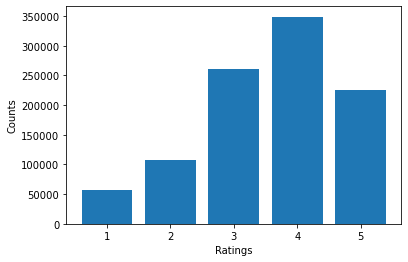

In [791]:
temp_df = ratings_df.groupby(['rating']).size()
plt.bar([1,2,3,4,5], height = list(temp_df))
plt.xlabel('Ratings')
plt.ylabel('Counts')

## Splitting Training and Testing

In [56]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(ratings_df, test_size=0.1, random_state=1)
training_data = training_data.reset_index()
testing_data = testing_data.reset_index()

In [57]:
training_data.head(10)

,index,userID,movieID,rating,timestamp
0,316448,1883,2020,3,974876148
1,82748,549,930,5,976116072
2,215642,1306,3510,3,1015051441
3,148022,953,3911,5,975265409
4,522854,3224,2599,4,968520931
5,239179,1448,1777,4,976215730
6,887096,5359,2605,3,960604103
7,150825,970,61,3,980625205
8,346155,2030,296,5,974735107
9,995440,6011,3196,5,956786827


In [605]:
training_data.shape

(900188, 5)

In [59]:
testing_data.head()

,index,userID,movieID,rating,timestamp
0,630120,3809,2924,4,965962574
1,229398,1389,1957,4,994393608
2,758377,4510,1479,2,966788084
3,159240,1017,3840,3,975012700
4,254252,1546,1422,3,979097900


In [606]:
testing_data.shape

(100021, 5)

In [116]:
training_data.groupby(['userID']).size().sort_values(ascending = False).head(20)

userID
4169    2077
1680    1659
4277    1597
1941    1443
889     1360
1181    1355
3618    1214
2063    1183
1015    1165
4344    1150
1980    1142
1150    1135
5795    1131
2909    1130
4510    1117
1449    1116
5831    1105
4227    1098
424     1095
3391    1087
dtype: int64

## Splitting training to training and validation (For Cross-Validation)

In [391]:
training_data2, validation_data = train_test_split(training_data, test_size=0.2, random_state=1)

In [607]:
training_data2.shape

(720150, 5)

In [608]:
validation_data.shape

(180038, 5)

## Data Transformation

In [ ]:
# A_train = 6040 x 3952 matrix
# U = 6040 x k matrix
# V = 3952 x k matrix

In [87]:
# Full training data:
# convert ratings matrix to a (users x movies) matrix

# initialize matrix to 0. 0 rating also refer to movies which have not been rated.
A = np.zeros([6040,3952]) # 6040 x 3952

for i in range(0, len(ratings_df)):
    A[ratings_df.iloc[i,0]-1, ratings_df.iloc[i,1]-1] = ratings_df.iloc[i,2]

In [609]:
# For full data -> 0.9% training data, 0.1% testing data
u_train_list = np.array(training_data.loc[:,'userID']) - 1
v_train_list = np.array(training_data.loc[:,'movieID']) - 1

u_test_list = np.array(testing_data.loc[:,'userID']) - 1
v_test_list = np.array(testing_data.loc[:,'movieID']) - 1

In [610]:
# For training data -> 0.8% training data, 0.2% validation data
u_train2_list = np.array(training_data2.loc[:,'userID']) - 1
v_train2_list = np.array(training_data2.loc[:,'movieID']) - 1

u_val_list = np.array(validation_data.loc[:,'userID']) - 1
v_val_list = np.array(validation_data.loc[:,'movieID']) - 1

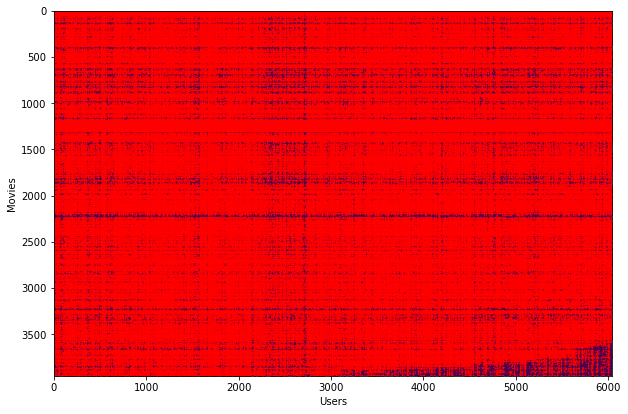

In [611]:
# let us display the matrix A and its training entries:
plt.figure(figsize = (10,10))
plt.imshow(A.T)
plt.xlabel('Users')
plt.ylabel('Movies')
plt.scatter(u_train_list, v_train_list, color='red', s=0.1)

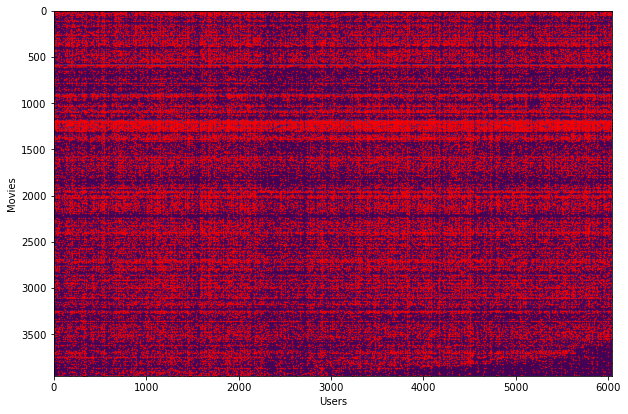

In [221]:
# let us display the matrix A and its training entries:
plt.figure(figsize = (10,10))
plt.imshow(A.T)
plt.xlabel('Users')
plt.ylabel('Movies')
plt.scatter(u_test_list, v_test_list, color='red', s=0.1)

## Naive Gradient Descent Method

In [627]:
@jax.jit
def MSE(U,V,A):
    error = (A - U@V)[u_train_list, v_train_list]
    return jnp.mean(error**2)

def MSE_test(U,V,A):
    error = (A - U@V)[u_test_list, v_test_list]
    return jnp.mean(error**2)

MSE_grad_u = jax.jit(jax.grad(MSE, argnums = 0))
MSE_grad_v = jax.jit(jax.grad(MSE, argnums = 1))

In [628]:
@jax.jit
def MSE2(U,V,A):
    error = (A - U@V)[u_train2_list, v_train2_list]
    return jnp.mean(error**2)

def MSE_val(U,V,A):
    error = (A - U@V)[u_val_list, v_val_list]
    return jnp.mean(error**2)

MSE_grad_u2 = jax.jit(jax.grad(MSE2, argnums = 0))
MSE_grad_v2 = jax.jit(jax.grad(MSE2, argnums = 1))

In [601]:
m,n = A.shape

### Naive Gradient Descent needs high learning rate

In [746]:
# initialize U and V randomly
np.random.seed(1)
r = 2
U = np.random.normal(0,1,size = (m,r))
V = np.random.normal(0,1,size = (r,n))

niter = 1000
learning_rate = 1.
loss_history = []
loss_history_test = []

for _ in range(niter):
    # compute the gradients
    grad_u = MSE_grad_u2(U,V,A)
    grad_v = MSE_grad_v2(U,V,A)

    # do the gradient updates
    U = U - learning_rate*grad_u
    V = V - learning_rate*grad_v

    # check the loss for monitoring purposes
    loss_history.append(np.sqrt(MSE2(U,V,A)))
    loss_history_test.append(np.sqrt(MSE_val(U,V,A)))

# initialize U and V randomly
np.random.seed(1)
r = 2
U = np.random.normal(0,1,size = (m,r))
V = np.random.normal(0,1,size = (r,n))

niter = 1000
learning_rate = 100.
loss_history2 = []
loss_history_test2 = []

for _ in range(niter):
    # compute the gradients
    grad_u = MSE_grad_u2(U,V,A)
    grad_v = MSE_grad_v2(U,V,A)

    # do the gradient updates
    U = U - learning_rate*grad_u
    V = V - learning_rate*grad_v

    # check the loss for monitoring purposes
    loss_history2.append(np.sqrt(MSE2(U,V,A)))
    loss_history_test2.append(np.sqrt(MSE_val(U,V,A)))

Text(0, 0.5, 'Train RMSE')

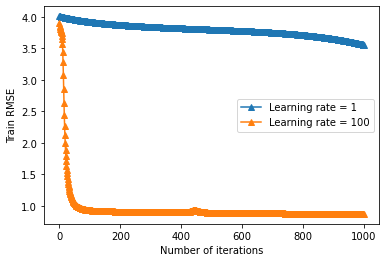

In [747]:
# plot
plt.plot(loss_history, '-^', label = "Learning rate = 1")
plt.plot(loss_history2, '-^', label = "Learning rate = 100")
plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Train RMSE")

In [748]:
loss_history_test[999] # validation rmse

3.5702293

In [749]:
loss_history_test2[999] # validation rmse

0.8898936

In [621]:
# initialize U and V randomly
np.random.seed(1)
r = 2
U = np.random.normal(0,1,size = (m,r))
V = np.random.normal(0,1,size = (r,n))

niter = 1000
learning_rate = 100.
loss_history = []
loss_history_test = []

for _ in range(niter):
    # compute the gradients
    grad_u = MSE_grad_u2(U,V,A)
    grad_v = MSE_grad_v2(U,V,A)

    # do the gradient updates
    U = U - learning_rate*grad_u
    V = V - learning_rate*grad_v

    # check the loss for monitoring purposes
    loss_history.append(MSE2(U,V,A))
    loss_history_test.append(MSE_val(U,V,A))

Text(0, 0.5, 'RMSE')

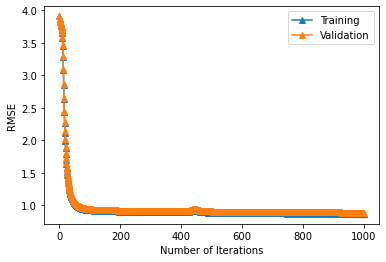

In [626]:
plt.plot(np.sqrt(np.array(loss_history)), '-^', label = "Training")
plt.plot(np.sqrt(np.array(loss_history_test)), '-^', label = "Validation")
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")

### Optimal Number of Latent Factors for Naive Gradient Descent

In [630]:
def naive_grad_descent_cv(r):
    # initialize U and V randomly
    np.random.seed(1)
    U = np.random.normal(0,1,size = (m,r))
    V = np.random.normal(0,1,size = (r,n))

    niter = 1000
    learning_rate = 100.
    loss_history = []
    loss_history_test = []

    for _ in range(niter):
        # compute the gradients
        grad_u = MSE_grad_u2(U,V,A)
        grad_v = MSE_grad_v2(U,V,A)

        # do the gradient updates
        U = U - learning_rate*grad_u
        V = V - learning_rate*grad_v

        # check the loss for monitoring purposes
        loss_history.append(np.sqrt(MSE2(U,V,A)))
        loss_history_test.append(np.sqrt(MSE_val(U,V,A)))
        
    return np.sqrt(MSE_val(U,V,A))

In [637]:
r_list = [1, 2, 4, 6, 8, 10, 20, 30, 40, 50]
val = []

for i in r_list:
    start_time = time.time()
    pred = naive_grad_descent_cv(i)
    val.append(pred)
    end_time = time.time()
    print(f"r:{i} \t Validation RMSE:{pred} \t Time Taken:{end_time - start_time}")

r:1 	 Validation RMSE:0.9107925891876221 	 Time Taken:120.5386381149292
r:2 	 Validation RMSE:0.8898935914039612 	 Time Taken:215.032860994339
r:4 	 Validation RMSE:0.8941957354545593 	 Time Taken:231.0776960849762
r:6 	 Validation RMSE:0.9077463150024414 	 Time Taken:232.08585381507874
r:8 	 Validation RMSE:0.9194793701171875 	 Time Taken:249.26659297943115
r:10 	 Validation RMSE:0.9385179281234741 	 Time Taken:268.07734394073486
r:20 	 Validation RMSE:1.0401134490966797 	 Time Taken:258.80430006980896
r:30 	 Validation RMSE:1.1649430990219116 	 Time Taken:298.0581181049347
r:40 	 Validation RMSE:1.3158483505249023 	 Time Taken:322.2390282154083
r:50 	 Validation RMSE:1.4812592267990112 	 Time Taken:316.44426798820496


Text(0, 0.5, 'RMSE')

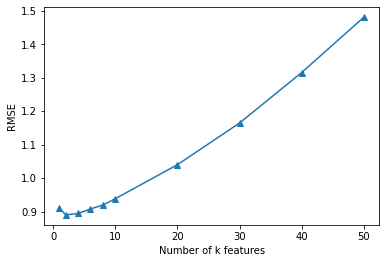

In [638]:
plt.plot(r_list, val, '-^')
plt.xlabel("Number of k features")
plt.ylabel("RMSE")

### Best Model on Naive Gradient Descent (r = 2)

In [639]:
r = 2

# initialize U and V randomly
np.random.seed(1)
U_init = np.random.normal(0,1,size = (m,r))
V_init = np.random.normal(0,1,size = (r,n))

In [640]:
U, V = np.copy(U_init), np.copy(V_init)

niter = 1000
learning_rate = 100.
loss_history = []
loss_history_test = []

for _ in range(niter):
    # compute the gradients
    grad_u = MSE_grad_u(U,V,A)
    grad_v = MSE_grad_v(U,V,A)
    
    # do the gradient updates
    U = U - learning_rate*grad_u
    V = V - learning_rate*grad_v
    
    # check the loss for monitoring purposes
    loss_history.append(jnp.sqrt(MSE(U,V,A)))
    loss_history_test.append(jnp.sqrt(MSE_test(U,V,A)))

In [641]:
np.save("/Users/hean/Desktop/Xinxuan/ml-1m/u_naive_gd", U)
np.save("/Users/hean/Desktop/Xinxuan/ml-1m/v_naive_gd", V)

Text(0, 0.5, 'RMSE')

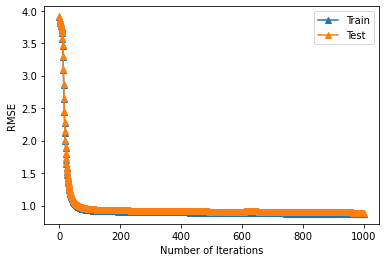

In [642]:
plt.plot(loss_history, '-^', label = 'Train')
plt.plot(loss_history_test, '-^', label = 'Test')
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")

In [644]:
jnp.sqrt(MSE_test(U,V,A))

DeviceArray(0.891772, dtype=float32)

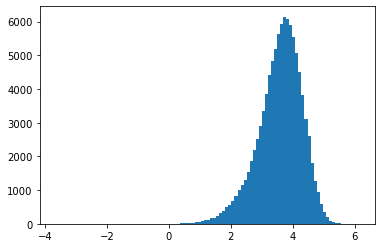

In [645]:
_ = plt.hist(((U@V)[u_test_list, v_test_list]), bins = 100)

## Stochastic Gradient Descent

In [688]:
m,n = A.shape # 6040 x 3952
r = 5

In [689]:
# initialize U and V randomly
np.random.seed(1)
U_init = np.random.normal(0,1,size = (m,r))
V_init = np.random.normal(0,1,size = (r,n))

### Minibatch_size = 1000, r = 5, Learning_rate = 1

In [690]:
n_epoch = 15
minibatch_size = 1000 #size of the minibatchs
N = len(u_train2_list)

A_indices = list(zip(u_train2_list, v_train2_list))
A_indices = np.array(A_indices)

loss_history = []
loss_history_end_epoch = []
val_list = []
train_list = []

U = np.copy(U_init)
V = np.copy(V_init)

learning_rate = 1.

for epoch in range(n_epoch):
    start_time = time.time()
    
    # go through all the minibatches, sequetially
    n_minibatch = N // minibatch_size + 1 
    
    # randomize the batches
    np.random.shuffle(A_indices)
    
    all_loss_within_epoch = []
    
    for k in range(n_minibatch):
        # create the minibatch of examples
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        
        U_indices = A_indices[batch_indices,0]
        V_indices = A_indices[batch_indices,1]
        
        def MSE_sgd(U,V,A):
            error = (A-U@V)[U_indices,V_indices]
            return jnp.mean(error**2)
        MSE_sgd_grad_u = jax.jit(jax.grad(MSE_sgd,argnums=0))
        MSE_sgd_grad_v = jax.jit(jax.grad(MSE_sgd,argnums=1))
        
        # compute the stochastic gradient
        grad_u = MSE_sgd_grad_u(U,V,A)
        grad_v = MSE_sgd_grad_v(U,V,A)
        
        # do one step of SGD
        U = U - learning_rate*grad_u
        V = V - learning_rate*grad_v
        
        # book-keeping
        loss_history.append(np.sqrt(MSE_sgd(U,V,A)))
        all_loss_within_epoch.append(np.sqrt(MSE_sgd(U,V,A)))
    loss_history_end_epoch.append(np.mean(all_loss_within_epoch))
    
    end_time = time.time()
    
    if epoch % 1 == 0:
        total_time = end_time - start_time
        val_rmse = np.sqrt(MSE_val(U, V, A))
        train_rmse = np.sqrt(MSE2(U,V,A))
        val_list.append(val_rmse)
        train_list.append(train_rmse)
        print(f"epoch:{epoch+1} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t Train RMSE:{train_rmse:2.3f} \t Validation RMSE:{val_rmse:2.3f} \t Time Taken:{total_time}")
        

epoch:1 	 Loss:3.951 	 Train RMSE:3.812 	 Validation RMSE:3.841 	 Time Taken:180.30430102348328
epoch:2 	 Loss:3.455 	 Train RMSE:2.852 	 Validation RMSE:2.893 	 Time Taken:178.22662019729614
epoch:3 	 Loss:2.219 	 Train RMSE:1.803 	 Validation RMSE:1.849 	 Time Taken:177.7556779384613
epoch:4 	 Loss:1.557 	 Train RMSE:1.402 	 Validation RMSE:1.450 	 Time Taken:178.2860450744629
epoch:5 	 Loss:1.283 	 Train RMSE:1.215 	 Validation RMSE:1.262 	 Time Taken:177.3657238483429
epoch:6 	 Loss:1.146 	 Train RMSE:1.113 	 Validation RMSE:1.159 	 Time Taken:176.8517928123474
epoch:7 	 Loss:1.067 	 Train RMSE:1.052 	 Validation RMSE:1.097 	 Time Taken:176.2400929927826
epoch:8 	 Loss:1.019 	 Train RMSE:1.013 	 Validation RMSE:1.056 	 Time Taken:175.7273666858673
epoch:9 	 Loss:0.987 	 Train RMSE:0.987 	 Validation RMSE:1.029 	 Time Taken:177.0070300102234
epoch:10 	 Loss:0.966 	 Train RMSE:0.969 	 Validation RMSE:1.010 	 Time Taken:176.3816418647766
epoch:11 	 Loss:0.950 	 Train RMSE:0.956 	 Vali

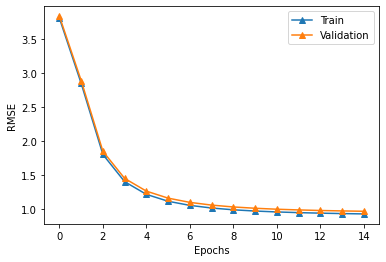

In [691]:
plt.plot(train_list, '-^', label = 'Train')
plt.plot(val_list, '-^', label = 'Validation')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()

## Stochastic Gradient Descent with Momentum

In [700]:
n_epoch = 15
minibatch_size = 1000 #size of the minibatchs
N = len(u_train2_list)

A_indices = list(zip(u_train2_list, v_train2_list))
A_indices = np.array(A_indices)

loss_history = []
loss_history_end_epoch = []
val_list = []
train_list = []

U = np.copy(U_init)
V = np.copy(V_init)

beta = 0.9
change_u = 0
change_v = 0

learning_rate = 1.

for epoch in range(n_epoch):
    start_time = time.time()
    
    # go through all the minibatches, sequetially
    n_minibatch = N // minibatch_size + 1 
    
    # randomize the batches
    np.random.shuffle(A_indices)
    
    all_loss_within_epoch = []
    
    for k in range(n_minibatch):
        # create the minibatch of examples
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        
        U_indices = A_indices[batch_indices,0]
        V_indices = A_indices[batch_indices,1]
        
        def MSE_sgd(U,V,A):
            error = (A-U@V)[U_indices,V_indices]
            return jnp.mean(error**2)
        MSE_sgd_grad_u = jax.jit(jax.grad(MSE_sgd,argnums=0))
        MSE_sgd_grad_v = jax.jit(jax.grad(MSE_sgd,argnums=1))
        
        # compute the stochastic gradient
        grad_u = MSE_sgd_grad_u(U,V,A)
        grad_v = MSE_sgd_grad_v(U,V,A)
        
        # do one step of SGD
        U_new = U - learning_rate*grad_u + beta*change_u
        V_new = V - learning_rate*grad_v + beta*change_v
        
        change_u = U_new - U
        change_v = V_new - V
        U = U_new
        V = V_new
        
        # book-keeping
        loss_history.append(np.sqrt(MSE_sgd(U,V,A)))
        all_loss_within_epoch.append(np.sqrt(MSE_sgd(U,V,A)))
    loss_history_end_epoch.append(np.mean(all_loss_within_epoch))
    
    end_time = time.time()
    
    if epoch % 1 == 0:
        total_time = end_time - start_time
        val_rmse = np.sqrt(MSE_val(U, V, A))
        train_rmse = np.sqrt(MSE2(U,V,A))
        val_list.append(val_rmse)
        train_list.append(train_rmse)
        print(f"epoch:{epoch+1} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t Train RMSE:{train_rmse:2.3f} \t Validation RMSE:{val_rmse:2.3f} \t Time Taken:{total_time}")
        
        

epoch:1 	 Loss:1.922 	 Train RMSE:0.993 	 Validation RMSE:1.030 	 Time Taken:186.71841716766357
epoch:2 	 Loss:0.961 	 Train RMSE:0.940 	 Validation RMSE:0.976 	 Time Taken:182.97726893424988
epoch:3 	 Loss:0.933 	 Train RMSE:0.927 	 Validation RMSE:0.963 	 Time Taken:182.63043785095215
epoch:4 	 Loss:0.922 	 Train RMSE:0.916 	 Validation RMSE:0.955 	 Time Taken:182.99069380760193
epoch:5 	 Loss:0.913 	 Train RMSE:0.908 	 Validation RMSE:0.949 	 Time Taken:183.00697493553162
epoch:6 	 Loss:0.905 	 Train RMSE:0.902 	 Validation RMSE:0.943 	 Time Taken:180.369469165802
epoch:7 	 Loss:0.899 	 Train RMSE:0.895 	 Validation RMSE:0.938 	 Time Taken:178.26516008377075
epoch:8 	 Loss:0.894 	 Train RMSE:0.891 	 Validation RMSE:0.936 	 Time Taken:177.54760885238647
epoch:9 	 Loss:0.889 	 Train RMSE:0.886 	 Validation RMSE:0.932 	 Time Taken:176.7770960330963
epoch:10 	 Loss:0.885 	 Train RMSE:0.883 	 Validation RMSE:0.931 	 Time Taken:178.16699409484863
epoch:11 	 Loss:0.882 	 Train RMSE:0.881 	

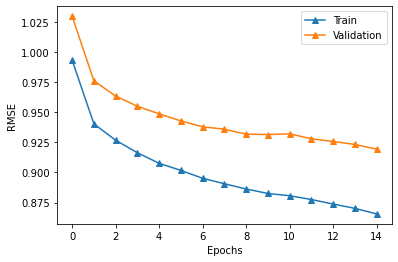

In [702]:
plt.plot(train_list, '-^', label = 'Train')
plt.plot(val_list, '-^', label = 'Validation')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()

### Need more Epochs and larger batch size

In [705]:
n_epoch = 60
minibatch_size = 5000 #size of the minibatchs
N = len(u_train2_list)

A_indices = list(zip(u_train2_list, v_train2_list))
A_indices = np.array(A_indices)

loss_history = []
loss_history_end_epoch = []
val_list = []
train_list = []

U = np.copy(U_init)
V = np.copy(V_init)

beta = 0.9
change_u = 0
change_v = 0

learning_rate = 1.

for epoch in range(n_epoch):
    start_time = time.time()
    
    # go through all the minibatches, sequetially
    n_minibatch = N // minibatch_size + 1 
    
    # randomize the batches
    np.random.shuffle(A_indices)
    
    all_loss_within_epoch = []
    
    for k in range(n_minibatch):
        # create the minibatch of examples
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        
        U_indices = A_indices[batch_indices,0]
        V_indices = A_indices[batch_indices,1]
        
        def MSE_sgd(U,V,A):
            error = (A-U@V)[U_indices,V_indices]
            return jnp.mean(error**2)
        MSE_sgd_grad_u = jax.jit(jax.grad(MSE_sgd,argnums=0))
        MSE_sgd_grad_v = jax.jit(jax.grad(MSE_sgd,argnums=1))
        
        # compute the stochastic gradient
        grad_u = MSE_sgd_grad_u(U,V,A)
        grad_v = MSE_sgd_grad_v(U,V,A)
        
        # do one step of SGD
        U_new = U - learning_rate*grad_u + beta*change_u
        V_new = V - learning_rate*grad_v + beta*change_v
        
        change_u = U_new - U
        change_v = V_new - V
        U = U_new
        V = V_new
        
        # book-keeping
        loss_history.append(np.sqrt(MSE_sgd(U,V,A)))
        all_loss_within_epoch.append(np.sqrt(MSE_sgd(U,V,A)))
    loss_history_end_epoch.append(np.mean(all_loss_within_epoch))
    
    end_time = time.time()
    
    if epoch % 1 == 0:
        total_time = end_time - start_time
        val_rmse = np.sqrt(MSE_val(U, V, A))
        train_rmse = np.sqrt(MSE2(U,V,A))
        val_list.append(val_rmse)
        train_list.append(train_rmse)
        print(f"epoch:{epoch+1} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t Train RMSE:{train_rmse:2.3f} \t Validation RMSE:{val_rmse:2.3f} \t Time Taken:{total_time}")
        
        

epoch:1 	 Loss:3.871 	 Train RMSE:3.383 	 Validation RMSE:3.422 	 Time Taken:37.412883281707764
epoch:2 	 Loss:2.221 	 Train RMSE:1.492 	 Validation RMSE:1.541 	 Time Taken:37.05931115150452
epoch:3 	 Loss:1.283 	 Train RMSE:1.133 	 Validation RMSE:1.181 	 Time Taken:37.38949918746948
epoch:4 	 Loss:1.076 	 Train RMSE:1.020 	 Validation RMSE:1.064 	 Time Taken:37.009857177734375
epoch:5 	 Loss:1.000 	 Train RMSE:0.972 	 Validation RMSE:1.013 	 Time Taken:36.95348310470581
epoch:6 	 Loss:0.964 	 Train RMSE:0.947 	 Validation RMSE:0.987 	 Time Taken:37.92902421951294
epoch:7 	 Loss:0.945 	 Train RMSE:0.933 	 Validation RMSE:0.972 	 Time Taken:36.55570101737976
epoch:8 	 Loss:0.933 	 Train RMSE:0.923 	 Validation RMSE:0.962 	 Time Taken:37.071393966674805
epoch:9 	 Loss:0.925 	 Train RMSE:0.917 	 Validation RMSE:0.956 	 Time Taken:37.030336141586304
epoch:10 	 Loss:0.919 	 Train RMSE:0.912 	 Validation RMSE:0.951 	 Time Taken:36.84649705886841
epoch:11 	 Loss:0.915 	 Train RMSE:0.908 	 Va

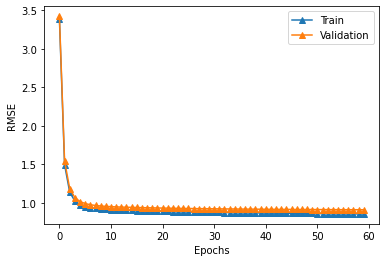

In [710]:
plt.plot(train_list, '-^', label = 'Train')
plt.plot(val_list, '-^', label = 'Validation')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()

### Using minibatch_size = 5000 SGDM to do CV

In [711]:
def stochastic_gdm(r):
    n_epoch = 60
    minibatch_size = 5000 #size of the minibatchs
    N = len(u_train2_list)

    A_indices = list(zip(u_train2_list, v_train2_list))
    A_indices = np.array(A_indices)

    loss_history = []
    loss_history_end_epoch = []
    val_list = []

    # initialize U and V randomly
    np.random.seed(1)
    U = np.random.normal(0,1,size = (m,r))
    V = np.random.normal(0,1,size = (r,n))
    
    beta = 0.9
    change_u = 0
    change_v = 0

    learning_rate = 1.

    for epoch in range(n_epoch):
        # go through all the minibatches, sequetially
        n_minibatch = N // minibatch_size + 1 

        # randomize the batches
        np.random.shuffle(A_indices)

        all_loss_within_epoch = []

        for k in range(n_minibatch):
            # create the minibatch of examples
            batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N

            U_indices = A_indices[batch_indices,0]
            V_indices = A_indices[batch_indices,1]

            def MSE_sgd(U,V,A):
                error = (A-U@V)[U_indices,V_indices]
                return jnp.mean(error**2)
            MSE_sgd_grad_u = jax.jit(jax.grad(MSE_sgd,argnums=0))
            MSE_sgd_grad_v = jax.jit(jax.grad(MSE_sgd,argnums=1))

            # compute the stochastic gradient
            grad_u = MSE_sgd_grad_u(U,V,A)
            grad_v = MSE_sgd_grad_v(U,V,A)

            # do one step of SGD
            U_new = U - learning_rate*grad_u + beta*change_u
            V_new = V - learning_rate*grad_v + beta*change_v

            change_u = U_new - U
            change_v = V_new - V
            U = U_new
            V = V_new
            
            # book-keeping
            loss_history.append(np.sqrt(MSE_sgd(U,V,A)))
            all_loss_within_epoch.append(np.sqrt(MSE_sgd(U,V,A)))
        loss_history_end_epoch.append(np.mean(all_loss_within_epoch))

        val_rmse = np.sqrt(MSE_val(U, V, A))
        val_list.append(val_rmse)
    
    return val_list


In [712]:
r_list = [1, 2, 3, 4, 6, 8, 10, 15, 20]
val_list = []

for i in r_list:
    start_time = time.time()
    
    preds = stochastic_gdm(i)
    val_list.append(preds)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print(f"Validation RMSE:{preds[len(preds)-1]:2.3f} \t Time Taken:{total_time}")


Validation RMSE:0.914 	 Time Taken:1607.755150794983
Validation RMSE:0.895 	 Time Taken:2017.6653859615326
Validation RMSE:0.894 	 Time Taken:2059.7801570892334
Validation RMSE:0.899 	 Time Taken:2142.953174829483
Validation RMSE:0.911 	 Time Taken:2108.6991398334503
Validation RMSE:0.921 	 Time Taken:2275.464933872223
Validation RMSE:0.940 	 Time Taken:2420.7005009651184
Validation RMSE:0.987 	 Time Taken:2613.479308128357
Validation RMSE:1.032 	 Time Taken:2358.4114940166473


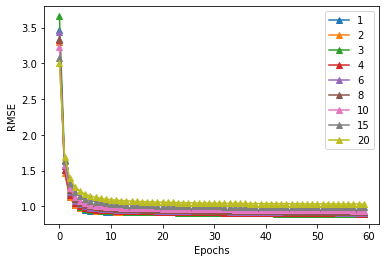

In [713]:
for i in range(0, len(r_list)):
    plt.plot(val_list[i], '-^', label = r_list[i])
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()

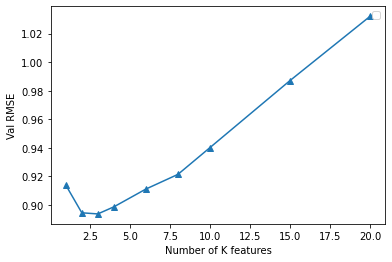

In [719]:
r_list = [1, 2, 3, 4, 6, 8, 10, 15, 20]
plt.plot(r_list, np.array(val_list)[:,59], '-^')
plt.xlabel("Number of K features")
plt.ylabel("Val RMSE")
plt.legend()

### Minibatch_size = 5000, r = 3, Learning_rate = 1: On FULL Train

In [720]:
# initialize U and V randomly
r = 3

np.random.seed(1)
U_init = np.random.normal(0,1,size = (m,r))
V_init = np.random.normal(0,1,size = (r,n))

In [721]:
n_epoch = 60
minibatch_size = 5000 #size of the minibatchs
N = len(u_train_list)

A_indices = list(zip(u_train_list, v_train_list))
A_indices = np.array(A_indices)

loss_history = []
loss_history_end_epoch = []
test_list = []
train_list = []

U = np.copy(U_init)
V = np.copy(V_init)

beta = 0.9
change_u = 0
change_v = 0

learning_rate = 1.

for epoch in range(n_epoch):
    start_time = time.time()
    
    # go through all the minibatches, sequetially
    n_minibatch = N // minibatch_size + 1 
    
    # randomize the batches
    np.random.shuffle(A_indices)
    
    all_loss_within_epoch = []
    
    for k in range(n_minibatch):
        # create the minibatch of examples
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        
        U_indices = A_indices[batch_indices,0]
        V_indices = A_indices[batch_indices,1]
        
        def MSE_sgd(U,V,A):
            error = (A-U@V)[U_indices,V_indices]
            return jnp.mean(error**2)
        MSE_sgd_grad_u = jax.jit(jax.grad(MSE_sgd,argnums=0))
        MSE_sgd_grad_v = jax.jit(jax.grad(MSE_sgd,argnums=1))
        
        # compute the stochastic gradient
        grad_u = MSE_sgd_grad_u(U,V,A)
        grad_v = MSE_sgd_grad_v(U,V,A)
        
        # do one step of SGD
        U_new = U - learning_rate*grad_u + beta*change_u
        V_new = V - learning_rate*grad_v + beta*change_v

        change_u = U_new - U
        change_v = V_new - V
        U = U_new
        V = V_new
        
        # book-keeping
        loss_history.append(np.sqrt(MSE_sgd(U,V,A)))
        all_loss_within_epoch.append(np.sqrt(MSE_sgd(U,V,A)))
    loss_history_end_epoch.append(np.mean(all_loss_within_epoch))
    
    end_time = time.time()
    
    if epoch % 1 == 0:
        total_time = end_time - start_time
        test_rmse = np.sqrt(MSE_test(U, V, A))
        train_rmse = np.sqrt(MSE(U,V,A))
        test_list.append(test_rmse)
        train_list.append(train_rmse)
        print(f"epoch:{epoch+1} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t Train RMSE:{train_rmse:2.3f} \t Test RMSE:{test_rmse:2.3f} \t Time Taken:{total_time}")
        
        

epoch:1 	 Loss:3.767 	 Train RMSE:3.194 	 Test RMSE:3.221 	 Time Taken:45.48494291305542
epoch:2 	 Loss:1.927 	 Train RMSE:1.298 	 Test RMSE:1.335 	 Time Taken:46.20125985145569
epoch:3 	 Loss:1.146 	 Train RMSE:1.042 	 Test RMSE:1.074 	 Time Taken:45.94640016555786
epoch:4 	 Loss:1.004 	 Train RMSE:0.970 	 Test RMSE:0.998 	 Time Taken:44.07061314582825
epoch:5 	 Loss:0.958 	 Train RMSE:0.942 	 Test RMSE:0.967 	 Time Taken:43.54472994804382
epoch:6 	 Loss:0.938 	 Train RMSE:0.928 	 Test RMSE:0.952 	 Time Taken:43.87556076049805
epoch:7 	 Loss:0.927 	 Train RMSE:0.920 	 Test RMSE:0.944 	 Time Taken:43.65756678581238
epoch:8 	 Loss:0.921 	 Train RMSE:0.915 	 Test RMSE:0.939 	 Time Taken:44.945250034332275
epoch:9 	 Loss:0.916 	 Train RMSE:0.911 	 Test RMSE:0.935 	 Time Taken:44.59084701538086
epoch:10 	 Loss:0.913 	 Train RMSE:0.908 	 Test RMSE:0.932 	 Time Taken:43.67491888999939
epoch:11 	 Loss:0.910 	 Train RMSE:0.905 	 Test RMSE:0.929 	 Time Taken:44.90407872200012
epoch:12 	 Loss:0.

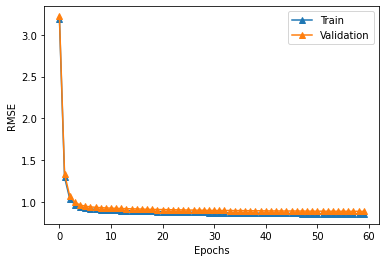

In [722]:
plt.plot(train_list, '-^', label = 'Train')
plt.plot(test_list, '-^', label = 'Validation')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()

In [723]:
np.sqrt(MSE_test(U,V,A))

0.8908641

In [724]:
# Save the model!!
np.save("/Users/hean/Desktop/Xinxuan/ml-1m/u_sgdm", U)
np.save("/Users/hean/Desktop/Xinxuan/ml-1m/v_sgdm", V)